# <center>Block 6: Semi-discrete optimal transport</center>
### <center>Alfred Galichon (NYU)</center>
## <center>`math+econ+code' masterclass on matching models, optimal transport and applications</center>
<center>© 2018-2019 by Alfred Galichon. Support from NSF grant DMS-1716489 is acknowledged. James Nesbit contributed.</center>

## Optimal transport I: Semidiscrete matching

## References

* [OTME], Ch. 5

* Anderson, de Palma, and Thisse (1992). *Discrete Choice Theory of Product Differentiation*. MIT.

* Aurenhammer (1987). Power Diagrams: Properties, Algorithms and Applications. *SIAM J Computing*.

* Lancaster (1966). A New Approach to Consumer Theory. *JPE*.

* Berry, Pakes (2007). The Pure Characteristics Demand Model. *IER*.

* Feenstra, Levinsohn (1995). Estimating Markups and Market Conduct with Multidimensional Product Attributes. *ReStud*.

* Bonnet, Galichon, Shum (2017). Yoghurts Choose Consumers. Identification of Random Utility Models via Two-Sided Matching. *Mimeo*.

## Motivation and setting 

### Motivation

Today we'll consider a version of the transportation problem where we seek to match a continuous distribution on $\mathbb{R}^{d}$ with a discrete distribution. This problem is called a *semi-discrete transportation* problem.

Actually, we will introduce this problem not as a matching problem, but as a demand problem. We'll model the demand for facilities (such as schools, stores) in the physical space. The same approach applies to the demand for products (e.g. cars) in the characteristics space, see e.g. Lancaster (1966), Feenstra and Levinsohn (1995), and Berry and Pakes (2007).

We'll simulate fountain locations on a city represented by the two dimensional square.

## Setting

Consider inhabitants of a city whose geographic coordinates are $x\in\mathcal{X}=\left[0,1\right]^{2}$. More generally, $\mathcal{X}$ will be a convex subset of $\mathbb{R}^{d}$ ($d=2$ is only to fix ideas). The location of inhabitants is distributed according to a absolutely continuous distribution $P$ whose support is included on $\mathcal{X}$, normalized to $1$, so $P$ is a probability distribution.

There are $M$ fountains, located at points $y_{j}\in\mathbb{R}^{d}$, $1\leq j\leq M$. Fountain $j$ is assumed to have capacity $q_{j}$, and it is assumed that $\sum_{j}q_{j}=1$, which means that total supply equals the total demand.

An inhabitant at $x$ has a transportation cost associated with using fountain $j$ which is proportional to the square distance to the fountain

\begin{align*}
\tilde{\Phi}\left(  x,y\right)  :=-\left\vert x-y\right\vert ^{2}/2.
\label{Phistar}
\end{align*}

Let $\tilde{v}_{j}$ be the price charged by fountain $j$. The utility of the consumer at location $x$ is therefore $\tilde{\Phi}\left(  x,y_{j}\right) -\tilde{v}_{j}$, and the indirect surplus of the consumer at $x$ is given by

\begin{align*}
\tilde{u}\left(  x\right)  =\max_{j\in\left\{  1,...,M\right\}  }\left\{
\tilde{\Phi}\left(  x,y_{j}\right)  -\tilde{v}_{j}\right\} \label{ustar}
\end{align*}

### A reformulation

Without loss of generality, one can replace the quadratic surplus $\tilde{\Phi}\left(  x,y\right)  =-\left\vert x-y\right\vert ^{2}/2$ by the scalar product surplus

\begin{align*}
\Phi\left(  x,y\right)  :=x^{\intercal}y. \label{PhiScalProd}
\end{align*}

Indeed, note that $\tilde{\Phi}\left(  x,y\right)  =\Phi\left(  x,y\right) +\left\vert x\right\vert ^{2}/2+\left\vert y\right\vert ^{2}/2$, and introduce the *reduced indirect surplus* $u\left(  x\right)$ and the $v_{j}$'s the *reduced prices* as

\begin{align*}
u\left(  x\right)  =\tilde{u}\left(  x\right)  +\left\vert x\right\vert ^{2}/2\text{, and }v_{j}=\tilde{v}_{j}+\left\vert y_{j}\right\vert ^{2}/2, \label{uandv}
\end{align*}

One immediately sees that $\tilde{u}\left(  x\right)  +\tilde{v}_{j}\geq \tilde{\Phi}\left(  x,y_{j}\right)  $ if and only if $u\left(  x\right) +v_{j}\geq\Phi\left(  x,y_{j}\right)  $. It follows that the consumer at location $x$ chooses fountain $j$ that maximizes

<a name="PWAu"></a>
\begin{align*}
u\left(  x\right)  =\max_{j\in\left\{  1,...,M\right\}  }\left\{  \Phi\left(x,y_{j}\right)  -v_{j}\right\}  . \label{PWAu}
\end{align*}

Hence the problem can be reexpressed so that the surplus of consumer $x$ at fountain $j$ is simply $x^{\intercal}y_{j}-v_{j}$. It is clear from [this](#PWAu) that (unlike $\tilde{u}$), the reduced surplus $u$ is a piecewise affine and convex function from $\mathbb{R}^{d}$ to $\mathbb{R}$. The connection with convex and piecewise affine functions is the reason for
reformulating the problem as we did.

### Power Diagrams

The demand set of fountain $j$ is

\begin{align*}
\mathcal{X}_{j}^{v}:=\left\{  x\in\mathcal{X}:\tilde{\Phi}\left(x,y_{j}\right)  -\tilde{v}_{j}\geq\tilde{\Phi}\left(  x,y_{k}\right) -\tilde{v}_{k},~\forall k\right\}
\end{align*}

which is equivalent to

\begin{align*}
\mathcal{X}_{j}^{v}=\left\{  x\in\mathcal{X}:x^{\intercal}\left(  y_{j}
-y_{k}\right)  \geq v_{j}-v_{k},~\forall k\right\}.
\end{align*}


**Basic properties:**

* $\mathcal{X}_{j}$ is a convex polyhedron;

* The intersection of $\mathcal{X}_{j}$ and $\mathcal{X}_{k}$'s lies in the hyperplane of equation $\{x:x^{\intercal}\left(  y_{j}-y_{k}\right) +v_{k}-v_{j}=0\}$;

* The set $\mathcal{X}_{j}$ weakly increases when $v_{k}$ ($k\neq j$) increases, and strictly decreases when $v_{j}$ decreases.

The system of sets $\left(  \mathcal{X}_{j}^{v}\right)  _{j}$ is called the *power diagram* associated to the price system $v$.

### Voronoi tesselations

If fountains do not charge any fee, that is, if $\tilde{v}_{j}=0$, or equivalently if $v_{j}=\left\vert y_{j}\right\vert ^{2}/2$, then $\mathcal{X}_{j}^{0}$ is the set of consumers who are closer to fountain $j$ than to any other fountain. The cells $\mathcal{X}_{j}^{0}$ form a partition of $\mathcal{X}$ called *Voronoi tesselation*, which is a very particular case of a power diagram. The Voronoi diagrams have the property that fountain $j$ belongs to cell $\mathcal{X}_{j}^{0}$; when $\tilde{v}\neq0$, this property may no longer hold for more general power diagrams.

We will generate a Voronoi tesselations where $10$ fountains are distributed uniformly on $[0,1]^2$, and $\tilde{v} = 0$.

Warning message:
"package 'magick' was built under R version 3.5.2"Linking to ImageMagick 6.9.9.14
Enabled features: cairo, freetype, fftw, ghostscript, lcms, pango, rsvg, webp
Disabled features: fontconfig, x11
Warning message:
"package 'transport' was built under R version 3.5.2"Warning message:
"package 'geometry' was built under R version 3.5.2"Loading required package: magic
Warning message:
"package 'magic' was built under R version 3.5.2"Loading required package: abind
Warning message:
"package 'abind' was built under R version 3.5.2"

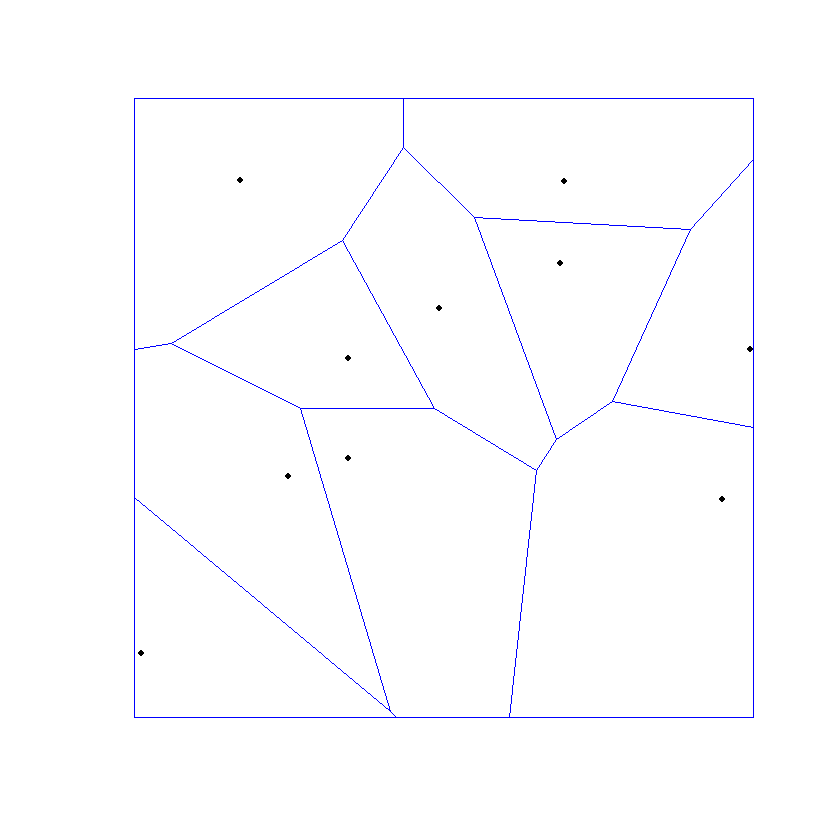

In [1]:
library("magick")  # For plotting animations
library("transport")
library("geometry")

SEED = 777
MAX_ITER = 1000
PREC = 0.01

set.seed(SEED)
nCells = 10

y1 = runif(nCells)  # coordinate 1
y2 = runif(nCells)  # coordinate 2
vtilde = rep(0, nCells)
q = rep(1/nCells, nCells)
demand = rep(0, nCells)
eps = 0.1  #tuning parameter

pwd = power_diagram(y1, y2, vtilde, rect = c(0, 1, 0, 1))

plot(pwd, weights = FALSE)

### Demand zone of a fountain

The demand for fountain $j$ is given by $P\left(\mathcal{X}_{j}\right)  =\Pr\left(  X\in\mathcal{X}_{j}\right)  $ where $X\sim P$, which is the mass of consumers who prefer fountain $j$ over the others.

Note that in general $x^{\intercal}y_{j}-u\left(  x\right)  \leq v_{j}$; yet if consumer $x$ chooses fountain $j$, then this inequality holds as an equality. Hence, the set of consumer who prefer fountain $j$ is given by

\begin{align*}
\mathcal{X}_{j}=\arg\max_{x\in\mathcal{X}}\left\{  x^{\intercal}y_{j}-u\left(
x\right)  \right\}  \label{defXj}
\end{align*}

By first order conditions $x\in\mathcal{X}_{j}$ if and only if $\nabla u\left(x\right) = y_{j}$ (assuming $u$ is differentiable at $x$). Therefore

\begin{align*}
\mathcal{X}_{j}:=\nabla u^{-1}\left(  \left\{  y_{j}\right\}  \right)  .
\label{Demand}
\end{align*}

### Equilibrium prices: Aurenhammer's method

Introduce the social welfare of producers and consumers as

<a name="defSbis"></a>
\begin{align*}
S\left(  v\right) :=\sum_{j}q_{j}v_{j}+\mathbb{E}_{P}\left[  \max_{j\in\left\{  1,...,M\right\}  }\left\{  X^{\intercal}y_{j}-v_{j}\right\} \right]  . \label{defSbis}
\end{align*}

We have

\begin{align*}
\frac{\partial S\left(  v\right)  }{\partial v_{k}}=q_{k}-\mathbb{E}%
_{P}\left[  1\left\{  \nabla u\left(  X\right)  =y_{k}\right\}  \right]
=q_{k}-P\left(  \mathcal{X}_{k}^{v}\right)  .
\end{align*}

Thus, the excess supply for fountain $j$ is given by

\begin{align*}
q_{k}-P\left(  \mathcal{X}_{k}^{v}\right)  =\frac{\partial S\left(  v\right)
}{\partial v_{k}} \label{exprDemand}%
\end{align*}

where $S$ is defined by [the social welfate](#defSbis) above.

Hence, market clearing prices, or equilibrium prices are prices $v$ such that demand and supply clear, that is, such that $q_{k}=P\left(\mathcal{X}_{k}^{v}\right)$ for each $k$; in other words 

\begin{align*}
\frac{\partial S\left(  v\right)  }{\partial v_{k}}=0.
\end{align*}

### Central planner's problem

The central planner may decide arbitrarily on assigning to each inhabitant $x$ a fountain $T\left(  x\right)  \in\left\{  y_{1},...,y_{M} \right\}  $, in a such way that each fountain $j$ is used to its full capacity, that is

\begin{align*}
P\left(  T\left(  X\right)  =y_{j}\right)  =q_{j},~\forall j\in\left\{
1,...,M\right\}  . \label{massBalance}%
\end{align*}

The planner seeks to maximize the total surplus subject to capacity constraints; hence

\begin{align*}
&  \max\mathbb{E}_{P}\left[  X^{\intercal}T\left(  X\right)  \right]
\label{welfare}\\
&  s.t. P\left(  T\left(  X\right)  =y_{j}\right)  =q_{j},~\forall j\in\left\{
1,...,M\right\}
\end{align*}

This is a Monge problem, whose Kantorovich relaxation is

\begin{align*}
\max_{\pi\in\mathcal{M}\left(  P,Q\right)  }\mathbb{E}_{\pi}\left[X^{\intercal}Y\right]  .
\end{align*}

### Duality

By the Monge-Kantorovich theorem, the dual problem is

<a name='dualKantoContDiscr'></a>
\begin{align*}
&  \min_{u,v}\mathbb{E}_{P}\left[  u\left(  X\right)  \right]  +\mathbb{E} _{Q}\left[  v\left(  Y\right)  \right] \label{dualKantoContDiscr}\\
&  s.t. u\left(  x\right)  +v\left(  y\right)  \geq x^{\intercal}y,
\end{align*}

where the constraint should hold almost surely with respect to $P$ and $Q$.

The constraint should be verified for $y\in\left\{  y_{1},...,y_{M}\right\}  $, and the constraint+optimality implies $u\left(  x\right) =\max_{j\in\left\{  1,...,M\right\}  }\left\{  \Phi\left(  x,y_{j}\right) -v_{j}\right\}  $. Thus, the [dual problem](#dualKantoContDiscr) rewrites as

\begin{align*}
\min_{v\in\mathbb{R}^{M}}\mathbb{E}_{P}\left[  \max_{j\in\left\{1,...,M\right\}  }\left\{  X^{\intercal}y_{j}-v_{j}\right\}  \right] +\sum_{j=1}^{M}q_{j}v_{j} \label{MKfiniteDim}
\end{align*}

which is the minimum of $S$ over $v\in\mathbb{R}^{M}.$

As a result:

1. There exist equilibrium prices, which are the minimizers of $S$.

2. The total welfare at equilibrium coincides with the optimal welfare.

## Monge vs Kantorovich

Note that

\begin{align*}
\arg\max_{j\in\left\{  1,...,M\right\}  }\left\{  \Phi\left(  x,y_{j}\right)
-v_{j}\right\}
\end{align*}

is a singleton for almost every $x$ (it is not a singleton when $x$ is at the boundary between two cells). The assumption that $P$ is absolutely continuous is crucial here.

Hence the map

\begin{align*}
T\left(  x\right)  =\nabla u\left(  x\right)
\end{align*}
 
is defined almost everywhere and coincides with $\arg\max$ whenever it is defined. Thus the Monge and the Kantorovich problems have the same solutions.

### Determination of prices

We turn to a discussion on the numerical determination of the prices (we discuss the determination of the $v$'s, as the expression for the $w$'s immediately follows). The function $F$ to minimize being convex, we can use a standard gradient descent algorithm in which the increase in prices is given by

\begin{align*}
v_{j}^{t+1}-v_{j}^{t}=\varepsilon\left(  P\left(  \nabla u\left(  X\right)
=y_{k}\right)  -q_{k}\right)  , \label{tatonnement}%
\end{align*}

which has immediately an economic interpretation: the fountains that are over-demanded *raise* their prices, while the fountains that are under-demanded *lower* their prices. This a *tâtonnement process*.

---
**Algorithm**
Take an initial guess of $v^{0}$. At step $t$, define $v^{t+1}$ by

\begin{align*}
v_{j}^{t+1}=v_{j}^{t}-\varepsilon_{t}\frac{\partial S}{\partial v_{j}}\left(v^{t}\right),
\end{align*}

for $\varepsilon_{t}$ small enough. Stop when $\frac{\partial S}{\partial v_{j}}\left(  v^{t+1}\right)  $ is sufficiently close to zero.

## Computation

The prices adjust over time so that the area of the demand cells adjust to supply. For each cell j, set `cellj=pwd$cells[[j]]`, and demand is computed using

In [2]:
for (j in 1:nCells) {
    cellj = pwd$cells[[j]]
    demand[j] = polyarea(cellj[, 1], cellj[, 2])
}
print(demand - 0.1)

 [1] -0.030069573 -0.016570247 -0.038802835 -0.043641234  0.002014428
 [6] -0.024359557  0.035695538  0.025425664  0.077657409  0.012650408


where `polyarea`, from the ‘geometry` package, computes the area of a cell. Finally, the prices are adjusted using:

In [4]:
vtilde = vtilde - eps * (demand - q)

where `eps` is a tuning parameter which controls the speed of adjustment of the process, and the configuration converges to equilibrium. Running this until convergence

In [2]:
# Loop it

# create canvas
frames = image_graph(width = 800, height = 800, res = 150)

t = 1
cont = TRUE
while ((cont == TRUE) && (t < MAX_ITER)) {
    if (t%%10 == 0) {
        # Print on the screen some message
        cat(paste0("iteration: ", t, "\n"))
    }
    for (j in 1:nCells) {
        cellj = pwd$cells[[j]]
        demand[j] = polyarea(cellj[, 1], cellj[, 2])
    }
    if (max(abs(demand - q)) < PREC/nCells) {
        cont = FALSE
    } else {
        t = t + 1
        vtilde = vtilde - 0.1 * (demand - q)
        pwd = power_diagram(y1, y2, vtilde, rect = c(0, 1, 0, 1))
        plot(pwd, weights = FALSE)
    }
}

# animate
animation = image_animate(frames, 10)
image_write(animation, "powerdiagram.gif")
animation

iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50


<img src="data:image/gif;base64,R0lGODlhIAMgA/YAAAAAAAwMDBMTExkZGSIiIisrKzQ0NDw8PENDQ0xMTFNTU1paWmVlZWtr
a3V1dXt7ewAA2RMT7AAA/wsL/xkZ8RMT/xwc/yYm/yws/zQ0/zw8/0ND/0tL/1RU/1tb/2Nj
/2xs/3Nz/3x8/4KCgouLi5OTk5ubm6SkpKysrLS0tLu7u4SE/4yM/5SU/5ub/6Sk/6ys/7Oz
/7y8/8PDw8zMzNTU1Nzc3MPD/8zM/9TU/9zc/+Tk5Ozs7OPj/+zs//T09PT0/////wAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAAIAMg
AwAH/oBBgoOEhYaHiImKi4yNjo+QkZKTlJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7Cx
srO0tba3uLm6u7y9vr/AwcLDxMXGx8jJysvMzc7P0NHS09TV1tfY2drb3N3e3+Dh4uPk5ebn
6Onq6+zt7u/w8fLz9PX29/j5+vv8/f7/AAMKHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq
3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMq
Xcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3/nDjyp1Lt67du3jz
6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hT
q17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iz
a9/Ovbv37+DDix9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wAGKOCABBZo4IEI
Jqjgggw26OCDEEYo4YQUVmjhhRhmqOGGHHbo4YcghijiiCSWaOKJKKao4oostujiizDGKOOM
NNZo44045qjjjl1NIMGPQAYp5JBEFmnkkUgm/qnkkkw26eSTUEYp5ZRUVmnllVhmqeWWXGo5
QWQWSDDBBWSWaeaZaKap5ppstunmm3DGKeecdNZp55s+SnDnnnz26eefgAYq6KCErumjBZFd
oOdXG/x4mqIXJLqoV41K8Oikj0HKqKOmaQqZp11Vemmkn2LKlaidmtoYqFxpwGlprK6qqlao
wjrrYrFq5aqlqZKa6a1Y7TqqpL62+ippueIK7FXC9krsV83aWqys0+p67GjJKpbtVRlcK9q2
iIFbVbTILhuuuVV1y6u0z3pFLrboGiYuVeoOW2q1WdXr7L1f6csuv175Wy6+2sY7lcDwEpzY
vAd7GxrDhEEcFcLf/hocscVRYeAwaBIL1vFTFD+MsccjP6XxugO329XJ9v6qsFUs7+vyVzH/
O7NXNacMcFeKopywylz13LJjHzsltMxEl2z0xp8V/ZfTTOU5NLVeAQEkB0hT3dWuP25gc9Iv
TwXDj3lKoIHON2tl9Y834ADk2RWHLa/SSnHwYweC5PB23EBfFQOQhOj9YwYiy10Y1EflCUMh
gktAeNN0+4V4UR50fYgOQGIAueEXc76U2z8CgQjmP3r+WJiI7mxVni4oQnrkiDXe91QhDM5I
D0CarhjuZM8e1es+NMI77IMBUbbugE0eVJgSsPBID3mmXlkFZBO/l/I/rVB6JND/aIHo/pOd
XAH2eZHP0/A6SNK9BN9LVukEPph/l/w69SwCJT7kWUFkHwCZPv11AeBNXPCj/VUifwUEH2NE
ACQcCEKAc4EgTXwApBxcAoESqIACE9MCIMVgEBKMSwhlsisQZMJ4ZNugYf72o9aB0Hp6GSFM
xiamTQCBemIK3mFuAKQVFEKGbgFiS9YmgRtw4oZk0yFhXvcBQwiRLU9cid0kgLdOIDGHhKHg
j7DmRBiWz4s3kQHgPgEE5sFPMCh0HCKiqBY2oiRPHwRFGZMYmJ5Jr4vIexoYa1I5CXhtFMyT
QA/+oq4JqJAQbkRLIkkCOgkc0hNA6NkEBsmXKUpAiYdYpFk0/imSPL3gFD0T5F5A4L9FcJIs
p0TFDkqAgAfMQB61UyMqQpk+vGiPbYxIpVh0WQoTAOCXv1wAPBqHSVPQEh0pEMAvDbCDhLwA
SIvL5R7twstR1ACY2CTBO5jnvFUcsxwNwOYvaXAQMf6oBY6o5lfUGYoDiBOYP2jHLfO4CXVJ
oJbioME7f2mQRobgEezk2TRxsc9f2oAdw6NkK+xpQXEwoKA1IMjwPACJgAZtoLcoKACauQ77
xYKh4lDmPk8wEAz+EaAYjWBKa5GAgsZTHR3M4Cy45kBwLKCg5BQIDpFn0a30tBM72CcK1qFF
CTRUFjQFRwpcKpCeGTASP81KVDkx/gNxloAdu2piLSolgZp6o6XiVIFAdnVGSUz1KmfdxA9m
MIIUcFQdNPzSLbhqxG+QAJs5BUgfRTmJtFbFrwkhYl1vYcnBemMHPBhILI1aCcBOxbEHmWIV
c2FJGZAlphKwbGNXKkLOksScPsNFB4CkWbDQUAKftARko7LagaQxjrwY7Y9K2xUe/siHl2jt
U3QbkD6etBd7he1WGmdCTPC2Kcf1RyMfqYvgcmV4k82tZ9+S3H54chj9+1E0sZLGx2WiukoB
rz5IKUvsQjMrzKPnGqcbRPZ2hJjGIC9quZVCTogXKfe9B/PQeQz5pnYqUyzrJvJrFALTY57K
WOx/oZLd/nt6wsBEgXA80LeMxbrwKbcs4ickLBQOv8OjzGBgC59CwB8J177uhWKKMRLTp4YY
SPxdCgslEOMHr7iNN65IUY/aDBHT+HNAul8oPAwUIq+jhNLIcDeP8jqKisLIPoEyOp5Zw2mw
AEhLJopJSSFlnnS5HIKtxpVva5Q8aY7LOVZkmiNSqehaOXMugMENctADHzC3JnY05po3uWeH
mFOu18DskSYwAQtkYAMeAMEK4jznOt85JGR9NIrVy5cvjwOO2pBtlgh9gUN3QNGMzoEO7HwR
TSsUzZS+Xp8Z4ltuAOkFLRABCDqgAQxYgNBdAtIEKmBoRINazqImtWIrOMtV/o/F0uBYLjf6
eOJDAKEHOsCBDGAQ61nX+tZl69KuLYABXy9azjhwdDzGnNlUIBsn5/bGdblBujMf0QfRnna1
aW1rXOdaTLw+dKK/PedRS3oaVJ6vuY29S4IfhLze5QYO/z0KIMBb2tSWdQc2cAFs31tMhfb0
r2UQbIb7ArRZBqXBwZLubcDXG2MOOS8cHm9qr2DWG6h3trlE6F5/+tsc9zcuGvdPb458nT8f
CA5rzI21ufgZz275vClu8Xtvu9v7jnPOhT0K6Lai5HgOekAQHI6T4TMcLId4C14+cZlf/One
bgEMpu5xQqQRbqzAOk3kbo2EioOGWqVH2OVN9pg3/j3XNdf4CtQug3DbeaevoLtMFE+NnuFW
HGM0yN5dDnOzAx4WjIdJ5qPR4nLIlrYVYXkO+F75vyupmD5PdQy13o8dl0NwcEfJ5F3w8qHH
YvMuwb0z1FXccuSp7SPh3dGvznqfFl8fcUWHiIneEtleOPHHl2r07xHmc2jxjkOMPOanj1bu
16PN6ujZqVkiYiHf3vt/Rb88WAjoKf+o9y0BEvBHoXuW1D8ZmF5H71xSYifL4v4qAYDFgEFc
tA6VYlgqkSfjB32q90UNOBE+1l

   format width height colorspace matte filesize density
1     gif   800    800       sRGB  TRUE        0   72x72
2     gif   800    800       sRGB  TRUE        0   72x72
3     gif   800    800       sRGB  TRUE        0   72x72
4     gif   800    800       sRGB  TRUE        0   72x72
5     gif   800    800       sRGB  TRUE        0   72x72
6     gif   800    800       sRGB  TRUE        0   72x72
7     gif   800    800       sRGB  TRUE        0   72x72
8     gif   800    800       sRGB  TRUE        0   72x72
9     gif   800    800       sRGB  TRUE        0   72x72
10    gif   800    800       sRGB  TRUE        0   72x72
11    gif   800    800       sRGB  TRUE        0   72x72
12    gif   800    800       sRGB  TRUE        0   72x72
13    gif   800    800       sRGB  TRUE        0   72x72
14    gif   800    800       sRGB  TRUE        0   72x72
15    gif   800    800       sRGB  TRUE        0   72x72
16    gif   800    800       sRGB  TRUE        0   72x72
17    gif   800    800       sR